# Prever despesas médicas
Objetivo: Prever o custo de despesas médicas para uma amostra da população de pacientes de um hospital, considerando o hábito de fumar, idade, sexo, IMC e região

Referência: projeto da Formação Inteligência Artificial Aplicada à Medicina da Data Science Academy

Variáveis:
    
- idade: idade do paciente

- sexo: sexo do paciente (feminino, masculino)

- IMC: índice de massa corporal, usando a razão entre altura e peso (idealmente 18,5 a 24,9)

- filhos: número de filhos do paciente

- fumante: se fuma ou não

- região: a área residencial do paciente.

- custo_medico_anual: custo médico anual do paciente em uma clínica medica (variável alvo)

In [1]:
# Carregar pacotes
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# graficos na mesma pg
%matplotlib inline

In [2]:
# Importar dados
dados_desp_med = pd.read_csv('dados/despesas_medicas.csv')

In [3]:
print(dados_desp_med.shape)
dados_desp_med.head()

(1338, 7)


,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.90,0,yes,sudeste,16884.92400
1,18,masculino,33.77,1,no,sul,1725.55230
2,28,masculino,33.00,3,no,sul,4449.46200
3,33,masculino,NaN,0,no,nordeste,21984.47061
4,32,masculino,28.88,0,no,nordeste,3866.85520


In [5]:
# Visualizar tipos dos dados
dados_desp_med.dtypes

idade                   int64
sexo                   object
imc                   float64
filhos                  int64
fumante                object
regiao                 object
custo_medico_anual    float64
dtype: object

In [6]:
# Total de linhas por coluna
dados_desp_med.count()

idade                 1338
sexo                  1338
imc                   1325
filhos                1338
fumante               1338
regiao                1338
custo_medico_anual    1338
dtype: int64

In [7]:
# Verificar valores ausentes
dados_desp_med.isnull().sum().sort_values()

idade                  0
sexo                   0
filhos                 0
fumante                0
regiao                 0
custo_medico_anual     0
imc                   13
dtype: int64

In [8]:
# Porcentagem dos valores ausentes
dados_ausentes = dados_desp_med.isnull().sum().sort_values()
dados_ausentes = dados_ausentes[dados_ausentes > 0] / dados_desp_med.shape[0]
print(f'{dados_ausentes * 100} %')

imc    0.971599
dtype: float64 %


In [9]:
# Como a porcentagem de valores ausente é muito baixa, estrategia de tratamento é eliminar esses dados
dados_desp_med = dados_desp_med.dropna()

In [10]:
dados_desp_med.isnull().sum().sort_values()

idade                 0
sexo                  0
imc                   0
filhos                0
fumante               0
regiao                0
custo_medico_anual    0
dtype: int64

In [11]:
# Converter variáveis para o tipo inteiro a fim de calcular as correlação
from sklearn.preprocessing import LabelEncoder

dados_transf = dados_desp_med.apply(LabelEncoder().fit_transform)

# Análise exploratória

## Quais variáveis tem maior correlação com as despesas médicas

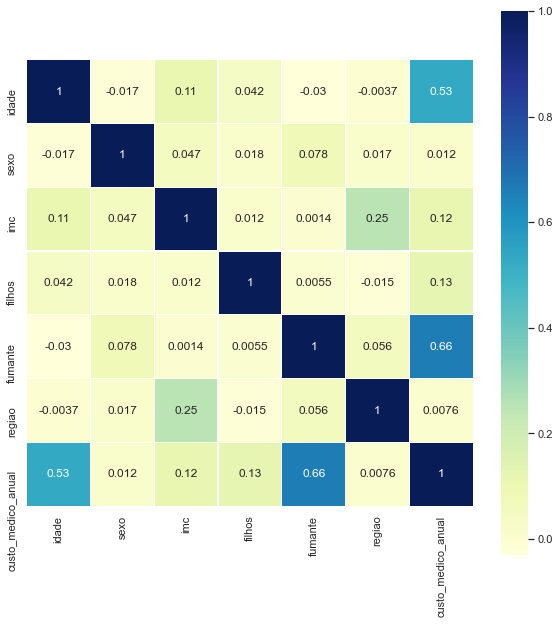

In [14]:
sns.set(color_codes = True)

plt.figure(figsize = (10,10))

sns.heatmap(dados_transf.astype(float).corr()
           , linewidths = .2
           , square = True
           , annot = True
           , cmap = 'YlGnBu')

plt.show()

## Entre fumantes e não fumantes, qual grupo tem maior custo

D:\Programs\Conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programs\Conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


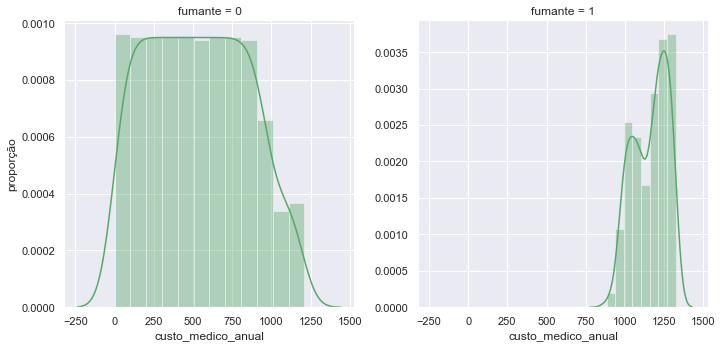

In [21]:
analise = sns.FacetGrid(dados_transf, col='fumante',height=5, sharey=False, sharex=True)
analise.map(sns.distplot, 'custo_medico_anual', color='g')
analise.set_axis_labels("custo_medico_anual", "proporção")